## Exercise 1: Martian topo map  (10 points)
1. Download the image “Olympus_Mons_MOLA_64ppd.jpg” from the exercise page. This is an image containing elevation data for the region around the Olympus Mons volcano on Mars, derived from the MOLA instrument on the Mars Global Surveyor spacecraft.  

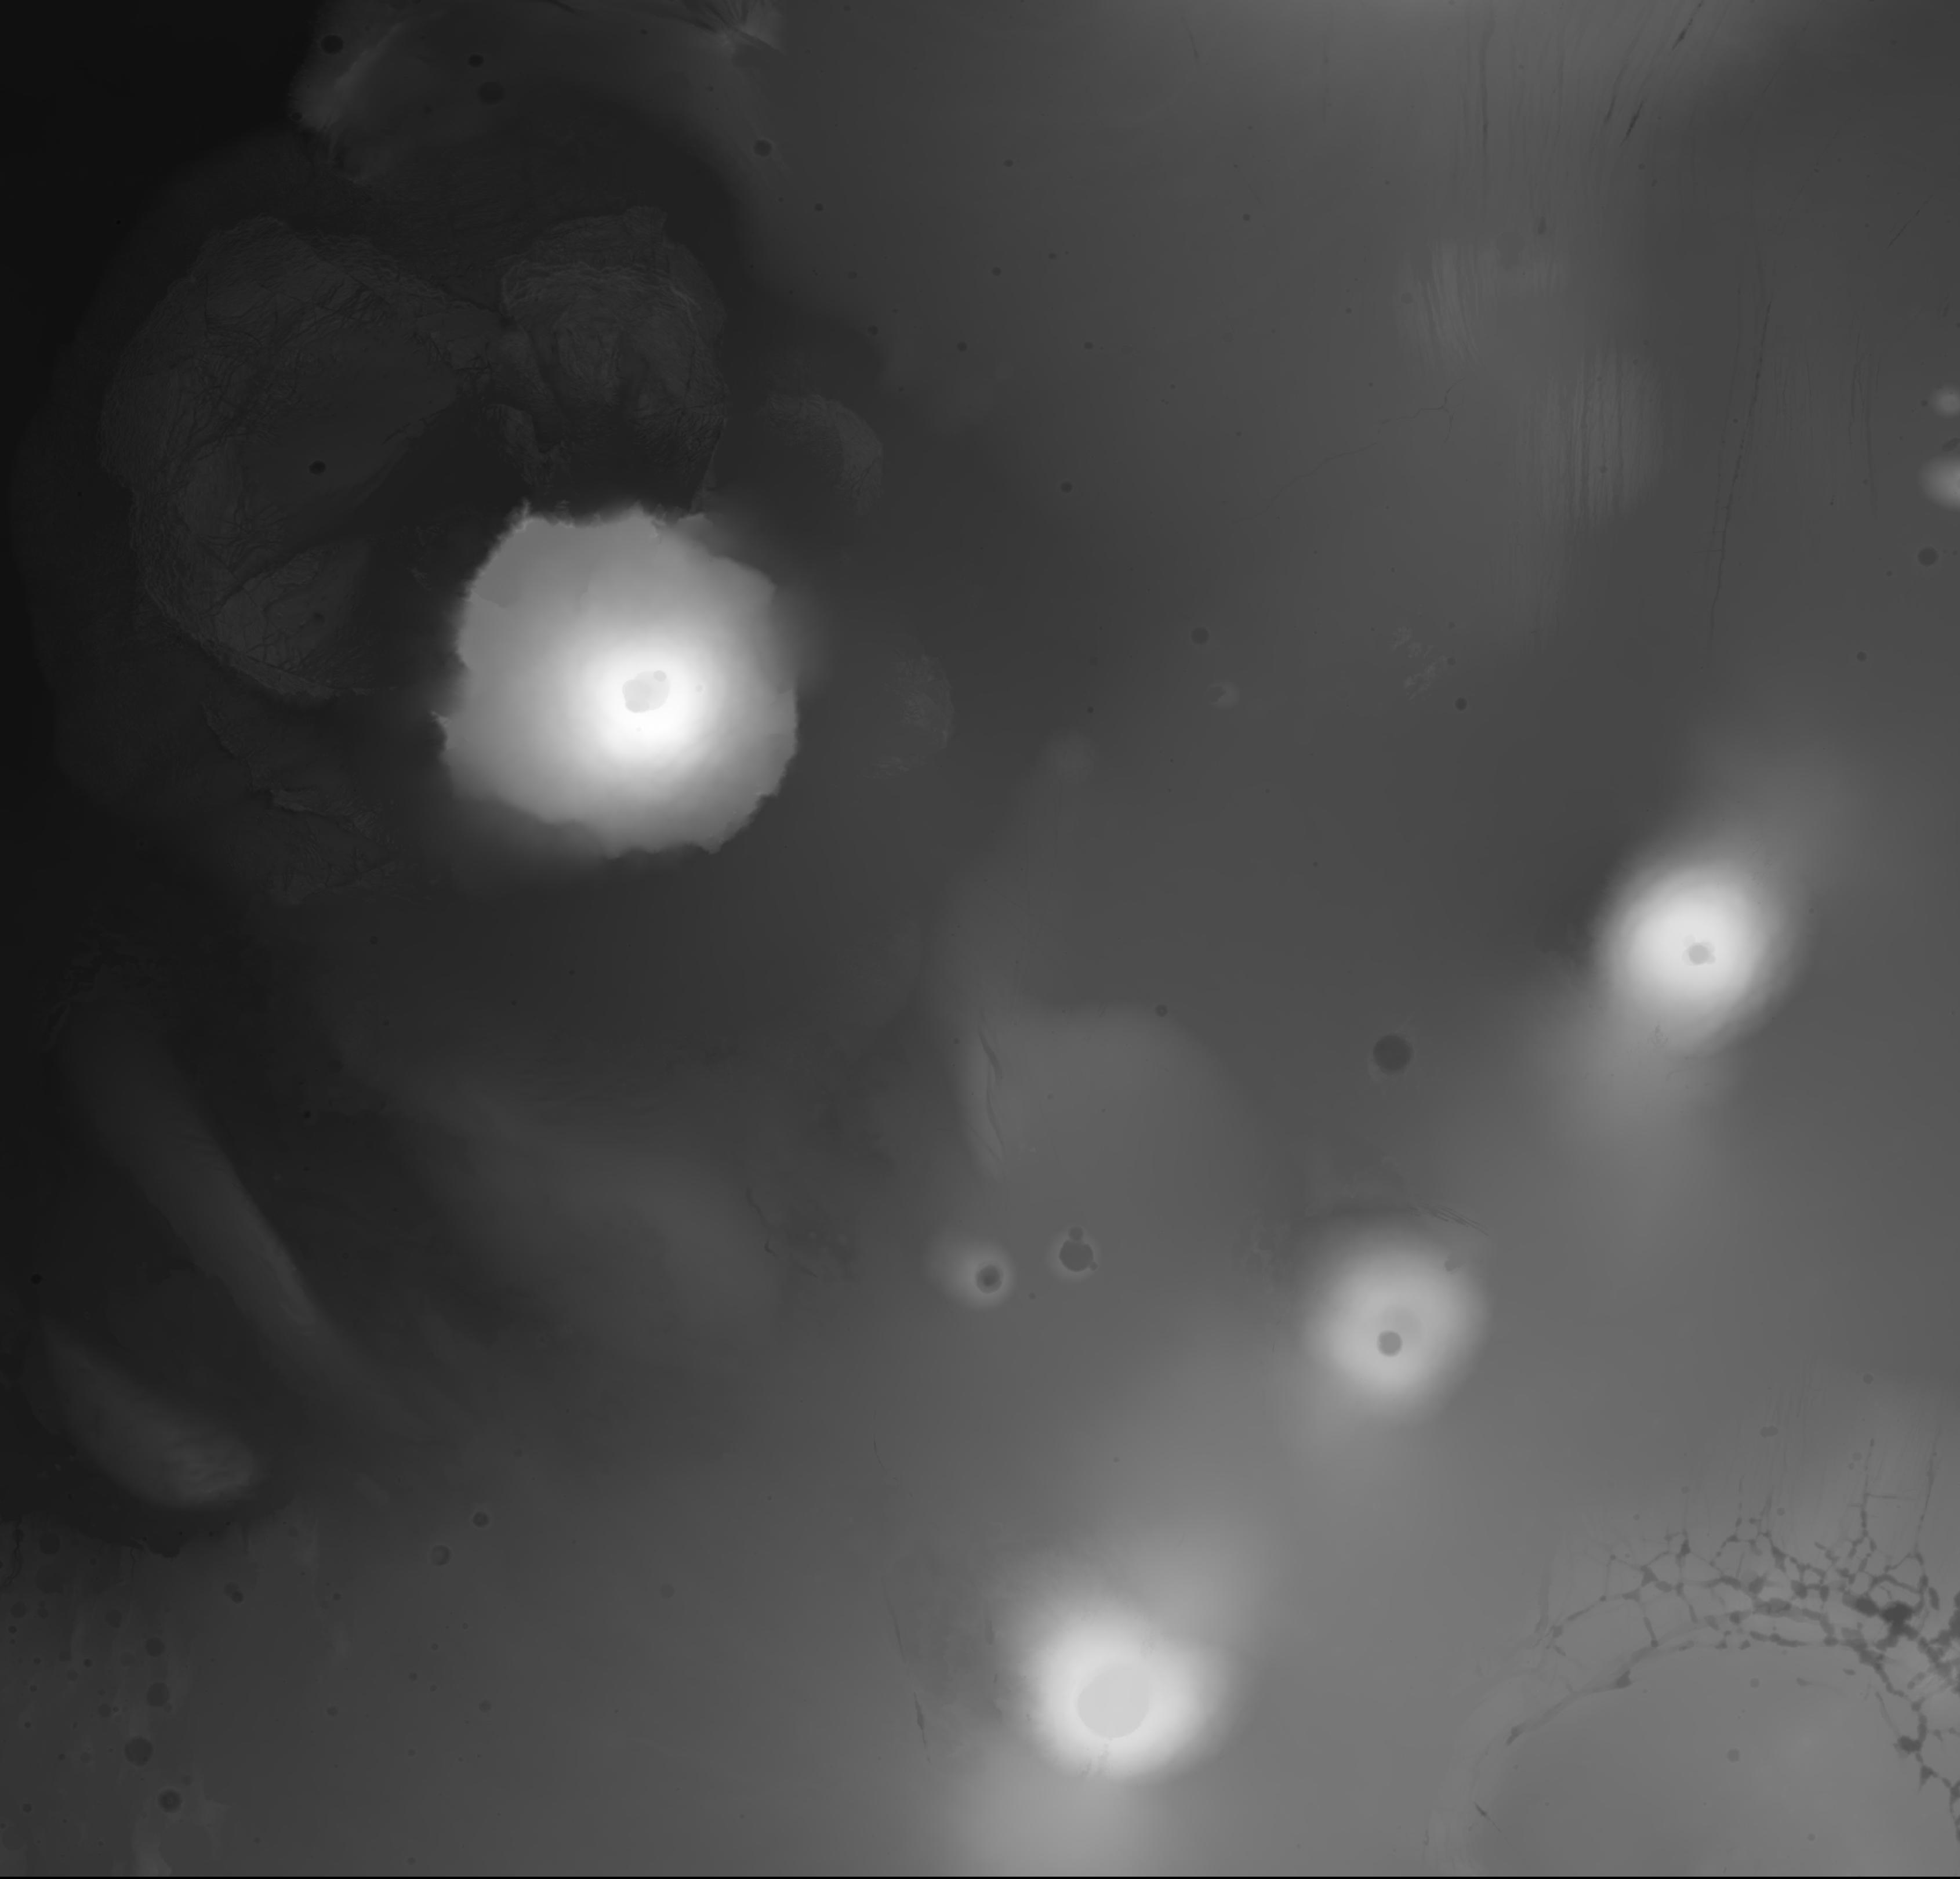

In [19]:
#Code Here
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

# NOT REALLY SURE WHAT TO DO HERE BUT WILL JUST LOAD IN THE IMAGE, But the question says download so yeah

path = r"C:\Users\eklav\OneDrive - University of Illinois - Urbana\astro_310\labs\lab16\Olympus_Mons_MOLA_64ppd.jpg"
img = Image.open(path)
img

2. Read the image into Python. The result will be a 3D array containing (R,G,B) values for each pixel. Sum over the axis with length 3 to get total values, then scale the result to the range (-5664, 21185). The result will be a 2D array of elevation values in meters. (2 points)


In [7]:
#Code Here
image_array = np.array(img)
# image_array
elev_data = image_array.sum(axis=2)
elev_data

scaled_d = (elev_data - elev_data.min()) / (elev_data.max() - elev_data.min())
scaled_d = scaled_d * (5664 + 21185) - 5664
scaled_d


array([[-3979.35686275, -3979.35686275, -3979.35686275, ...,
          548.12156863,   548.12156863,   548.12156863],
       [-3979.35686275, -3979.35686275, -3979.35686275, ...,
          548.12156863,   548.12156863,   548.12156863],
       [-3979.35686275, -3979.35686275, -3979.35686275, ...,
          548.12156863,   548.12156863,   548.12156863],
       ...,
       [-5664.        , -5664.        , -5664.        , ...,
        -5664.        , -5664.        , -5664.        ],
       [-5664.        , -5664.        , -5664.        , ...,
        -5558.70980392, -5558.70980392, -5558.70980392],
       [-5664.        , -5664.        , -5664.        , ...,
        -5664.        , -5664.        , -5664.        ]])

3. Determine the grid spacing in km so that you can specify the image extent in km. The image is centered on latitude 11.875 degrees N, longitude 235.5 degrees E. The radius of Mars is 3389.5 km. The image samples the MOLA dataset at 64 pixels per degree. (3 points)


In [8]:
#Code Here
# REMEMBER THIS IS ALL DONE IN KM
mars_radius = 3389.5 # in km
degrees = 1/64
circ = 2 * np.pi * mars_radius
# 2pi * r
grid_space = circ * degrees / 360 
grid_space # IN KM

0.9243427343179343

4. Make a color map of the data with appropriate image extents, and produce a vertical color bar. Label the color bar “Elevation (m)”. (2 points)



In [9]:
#Code Here
h,w = scaled_d.shape
dist = (grid_space * w / 2, - (grid_space * w / 2), - grid_space * h /2, grid_space * h/2)

dist


(1562.139220997309,
 -1562.139220997309,
 -1497.4352295950537,
 1497.4352295950537)

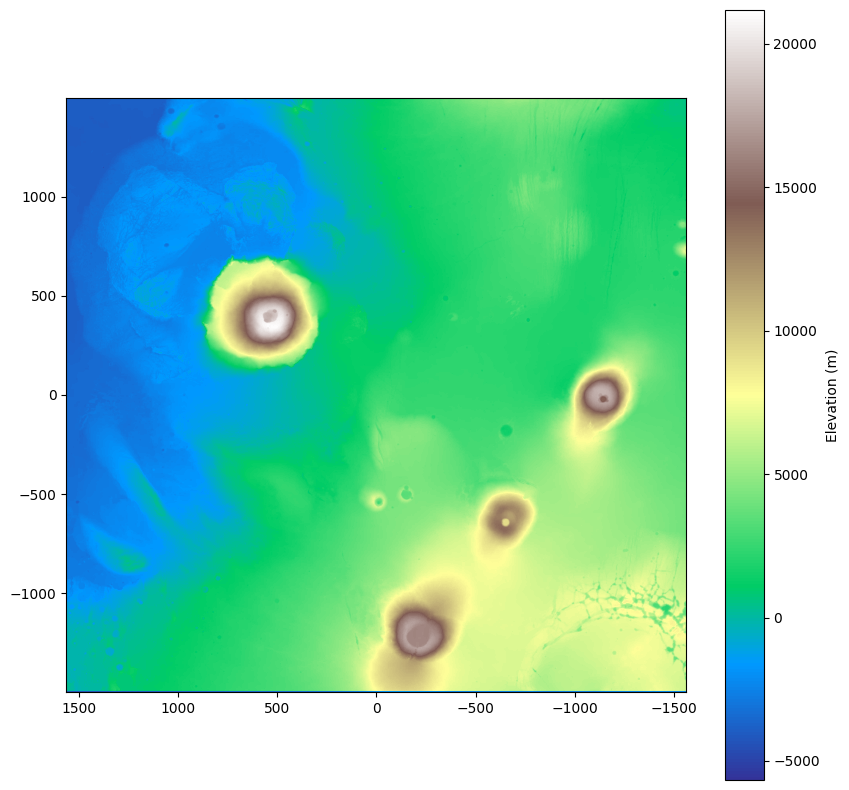

In [11]:
# NOW THE COLOR MAP here
plt.figure(figsize=(10, 10))
img_plot = plt.imshow(scaled_d, extent=dist, cmap='terrain', origin='upper')
plt.colorbar(img_plot).set_label("Elevation (m)")



5. Produce an array of contour levels spaced by 1000 m, starting with -5000 m, and ending with 21000 m. Using these levels, overlay a contour plot on the image, making the contours black with a line width of 0.5. You will need to use the argument `origin='upper'` to make the contours match up with the image (which has a different default for this keyword).  
 Add appropriate x and y labels and title. (3 points)

Text(0.5, 1.0, 'Olympus Mons Region (MOLA elevation)')

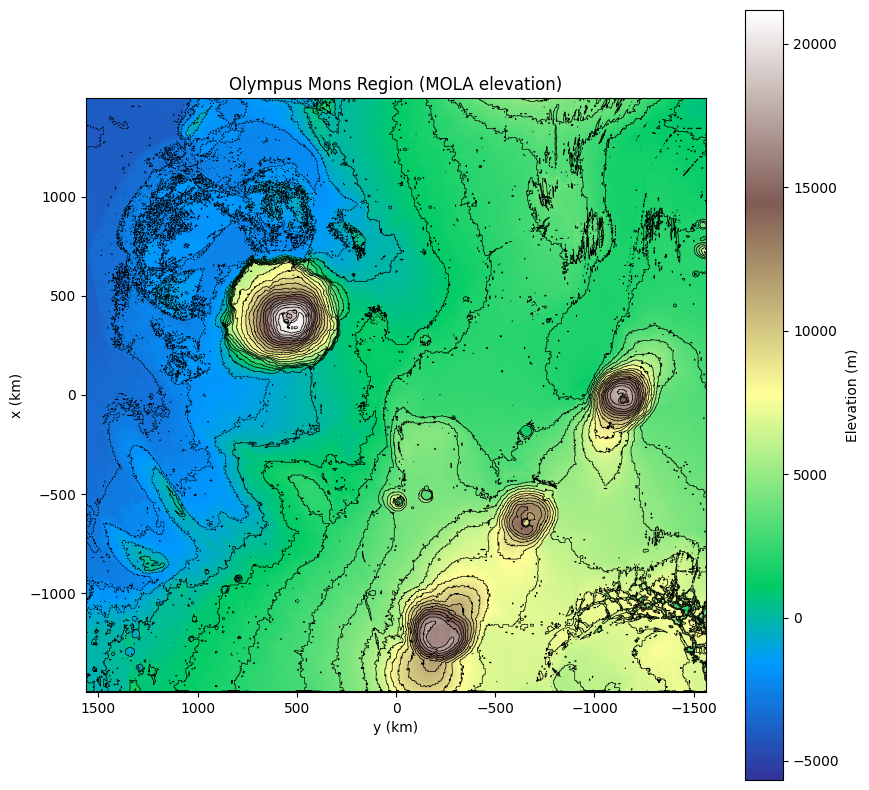

In [15]:
#Code Here
plt.figure(figsize=(10, 10))
img_plot = plt.imshow(scaled_d, extent=dist, cmap='terrain', origin='upper')
plt.colorbar(img_plot).set_label("Elevation (m)")
contour_levels = np.arange(-5000, 21001, 1000)
plt.contour(scaled_d, levels=contour_levels, colors='black', linewidths=0.5, extent=dist, origin='upper')
plt.xlabel('y (km)')
plt.ylabel('x (km)')
plt.title('Olympus Mons Region (MOLA elevation)')


## Exercise 2: pulsar positions  (10 points)
1. Using Astropy, read the ATNF pulsar catalog file ('atnf_pulsars_20200112.dat') we worked with last time into a table.


In [11]:
#Code Here
from astropy.table import Table
import astropy.units as u
from astropy.coordinates import SkyCoord, gal
from astropy.io import ascii

data_path = r"C:\Users\eklav\OneDrive - University of Illinois - Urbana\astro_310\labs\lab16\atnf_pulsars_20200112.dat"
pulsar_data = ascii.read(data_path,format = 'fixed_width', header_start = 2,delimiter = '|')
pulsar_data


<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    [(159.        , -83.28333333, 0.93),
     ( 32.99583333, -81.99338889, 1.52),
     (285.10166667, -79.86338889, 2.37), ...,
     (200.44013125,  83.39428667, 1.09),
     (357.76373375,  85.55572222, 2.62),
     (246.13633333,  86.72033611, 8.85)]>

2. Create an array of `SkyCoord` objects using the 'ra', 'dec', and 'distance' columns from the file. The RA and Dec are strings, but the `SkyCoord` constructor will interpret them properly if you supply `unit=('hour', 'deg', 'kpc')` as an argument. Note that a `SkyCoord` object can be a single position or an array of positions. (2 points)


In [12]:
#Code Here
sky_coords = SkyCoord(ra= pulsar_data['ra'], dec = pulsar_data['dec'], distance = pulsar_data['distance']*u.kpc, unit=('hourangle', 'deg', 'kpc'))
sky_coords

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    [(159.        , -83.28333333, 0.93),
     ( 32.99583333, -81.99338889, 1.52),
     (285.10166667, -79.86338889, 2.37), ...,
     (200.44013125,  83.39428667, 1.09),
     (357.76373375,  85.55572222, 2.62),
     (246.13633333,  86.72033611, 8.85)]>

3. By default these coordinates will be in the ICRS (equatorial) frame. Convert them to the galactocentric frame using the `transform_to` method. Galactocentric coordinates are like galactic coordinates, but the origin is the center of the Galaxy rather than our location. (2 points)


In [33]:
#Code Here
gal_coords = sky_coords.transform_to(Galactocentric)
gal_coords

<SkyCoord (Galactocentric: galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.122 kpc, galcen_v_sun=(12.9, 245.6, 7.78) km / s, z_sun=20.8 pc, roll=0.0 deg): (x, y, z) in kpc
    [( -7.70444385, -0.75744087, -0.32103686),
     ( -7.50637384, -1.08789292, -0.84402728),
     ( -6.65017507, -1.50988363, -1.06130962), ...,
     ( -8.59960834,  0.77022853,  0.6263682 ),
     ( -9.38741464,  2.05497125,  1.0406782 ),
     (-11.97021951,  6.7047189 ,  4.32896042)]>

4. As we did last time, create “binary” and “not-binary” mask arrays using the mask attribute of the 'companion_type' column from the table. (2 points)


In [40]:
#Code Here
companion_types = pulsar_data['companion_type']
mask = companion_types.mask
not_mask = ~companion_types.mask
mask,not_mask

(array([False,  True,  True, ...,  True,  True,  True]),
 array([ True, False, False, ..., False, False, False]))

5. Create a 3D scatter plot showing the (x,y,z) positions of the pulsars. Use different colored symbols for the binaries and isolated pulsars, and include a legend. Note that the position array we created in steps 2 and 3 has `x`, `y`, and `z` attributes that you can use directly. (3 points)


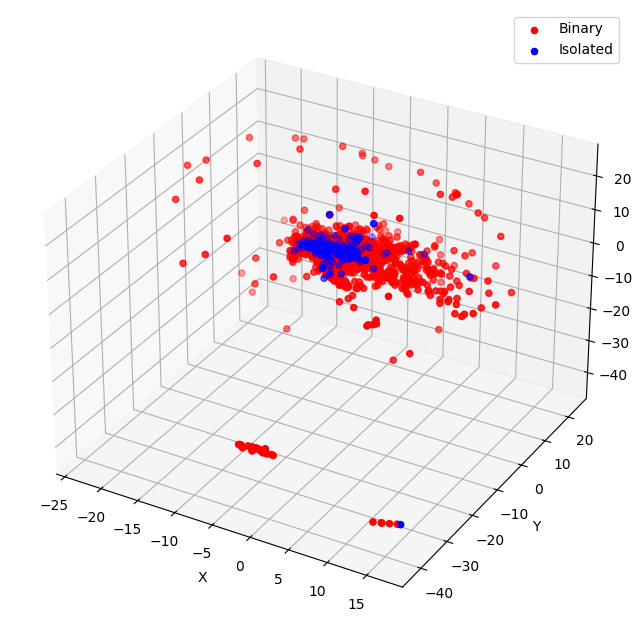

In [44]:
#Code Here
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(gal_coords.x[mask], gal_coords.y[mask], gal_coords.z[mask], c='red', label='Binary')
ax.scatter(gal_coords.x[not_mask], gal_coords.y[not_mask], gal_coords.z[not_mask], c='blue', label='Isolated')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
# fun trivia : my fav colors are red and blue

6. (Stretch goal) Create and plot a wireframe representing the Galactic plane. This should be a disk made from 13 radius points from 0 to 25 kpc and 181 angle points from 0 to \(2\pi\). Use the radius and angle to create the x and y coordinates, and make the z coordinates all zero. (1 point)


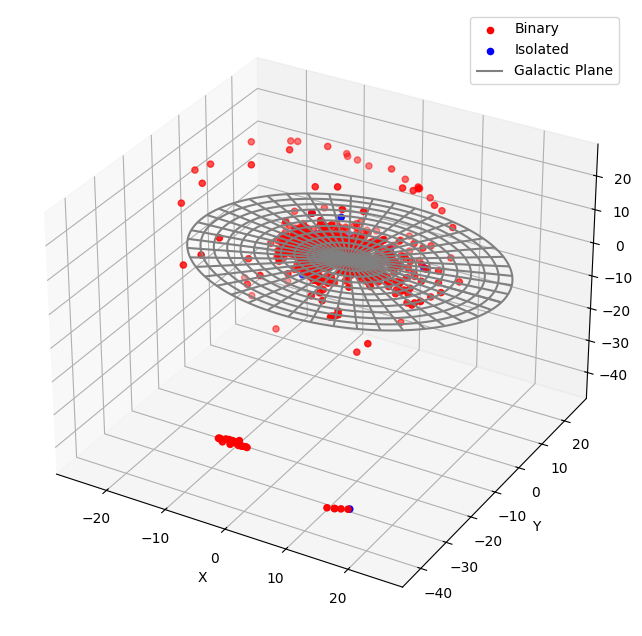

In [47]:
#Code Here
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(gal_coords.x[mask], gal_coords.y[mask], gal_coords.z[mask], c='red', label='Binary')
ax.scatter(gal_coords.x[not_mask], gal_coords.y[not_mask], gal_coords.z[not_mask], c='blue', label='Isolated')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

r = np.linspace(0, 25, 13) * u.kpc  
theta = np.linspace(0, 2 * np.pi, 181)  
R, Theta = np.meshgrid(r, theta)
X_plane = R * np.cos(Theta)
Y_plane = R * np.sin(Theta)
Z_plane = np.zeros(R.shape)  
ax.plot_wireframe(X_plane, Y_plane, Z_plane, color='gray', label='Galactic Plane')
ax.legend()

plt.show()